#  Data Wrangling (WeRateDogs) project
- The goal of this project is to wrangle , analyze and visualize the tweet archive of Twitter user @dog_rates, also known as WeRateDogs, which is a Twitter account that rates people's dogs with a humorous comment about the dog. 

In [1]:
import pandas as pd
import numpy as np 
import tweepy
import requests
import re
import json
import matplotlib.pyplot as plt
import datetime
import os 
import seaborn as sns
%matplotlib inline

# <font color='green'>Gathering data
we have 3 sets of data :
    
    1-The WeRateDogs Twitter archive given by Udacity ( twitter_archive_enhanced.csv).
    2-The tweet image predictions (image_predictions.tsv) hosted on Udacity's servers which display what breed of dog 
     (or other object, animal, etc.) is present in each tweet according to a neural network.
    3-Each tweet's retweet count and favorite count, Using the tweet IDs in the Twitter archive, by querying  
      the Twitter API for each tweet's JSON data using Python's Tweepy library and store each tweet's entire set of 
      JSON data in a file called (tweet_json.txt).



### 1- the twitter archive data

In [2]:
# reading the twitter archive data as a pd dataframe
archive_df = pd.read_csv('twitter-archive-enhanced.csv')

### 2- image prediction data

In [3]:
# using the Requests library to download the tsv file hosted on udacity server and write it to image_predictions.tsv
url = "https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv"
file_name = 'image-predictions.tsv'
responce = requests.get(url)
if not os.path.isfile(file_name):
    with open(file_name, 'wb') as file:
        file.write(responce.content)

In [4]:
# reading the image predictions data as a pd dataframe
image_predict_df = pd.read_csv('image-predictions.tsv', sep='\t')

### 3- twitter API data

In [5]:
# the twitter api keys and access tokens used to query the data using tweepy library
consumer_key = 'HIDDEN'
consumer_secret = 'HIDDEN'
access_token = 'HIDDEN'
access_secret = 'HIDDEN'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


In [6]:
# querying the data into the tweet_json.txt and storing errors in error list 
errors = []
if not os.path.isfile('tweet_json.txt'):
    with open ('tweet_json.txt', 'w') as file:
        for tweet_id in archive_df['tweet_id']:
            try:
                status = api.get_status(tweet_id, wait_on_rate_limit=True,  wait_on_rate_limit_notify=True, tweet_mode = 'extended')
                json.dump(status._json, file)
                file.write('\n')
            except Exception as e:
                print("Error on tweet id {}".format(tweet_id) + ";" + str(e))
                errors.append(tweet_id)

In [7]:
# empty list for inserting each tweet info 
tweet_id_df = []
with open('tweet_json.txt', 'r') as file:
    for line in file:# read the file 'tweet_json.txt' line by line
         tweet=json.loads(line) #load each line as dictionary
         tweet_id_df.append(tweet) # append the tweet dictionary to tweet_id_df list
        
# dataframe of the list with the required columns only
twitter_api_df = pd.DataFrame(tweet_id_df)[['id', 'favorite_count', 'retweet_count']] 
twitter_api_df = twitter_api_df.rename(columns={'id':'tweet_id'})
twitter_api_df.to_csv('df_tweets.csv', index = False)

# <font color='green'>Assessing data

## Quality issues:

### 1-the twitter archive data:

In [8]:
pd.set_option('display.max_colwidth', -1)
archive_df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,None,None,None,None


In [9]:
archive_df.tail()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a 1949 1st generation vulpix. Enjoys sweat tea and Fox News. Cannot be phased. 5/10 https://t.co/4B7cOc1EDq,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248165822465/photo/1,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a purebred Piers Morgan. Loves to Netflix and chill. Always looks like he forgot to unplug the iron. 6/10 https://t.co/DWnyCjf2mx,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226329800704/photo/1,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here is a very happy pup. Big fan of well-maintained decks. Just look at that tongue. 9/10 would cuddle af https://t.co/y671yMhoiR,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412701032449/photo/1,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is a western brown Mitsubishi terrier. Upset about leaf. Actually 2 dogs here. 7/10 would walk the shit out of https://t.co/r7mOb2m0UI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285002620928/photo/1,7,10,a,None,None,None,None
2355,666020888022790149,NaN,NaN,2015-11-15 22:32:08 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Here we have a Japanese Irish Setter. Lost eye in Vietnam (?). Big fan of relaxing on stair. 8/10 would pet https://t.co/BLDqew2Ijj,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666020888022790149/photo/1,8,10,None,None,None,None,None


In [10]:
archive_df.sample(5)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
643,793195938047070209,NaN,NaN,2016-10-31 21:00:23 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Say hello to Lily. She's pupset that her costume doesn't fit as well as last year. 12/10 poor puppo https://t.co/YSi6K1firY,NaN,NaN,NaN,"https://twitter.com/dog_rates/status/793195938047070209/photo/1,https://twitter.com/dog_rates/status/793195938047070209/photo/1",12,10,Lily,None,None,None,puppo
1859,675497103322386432,NaN,NaN,2015-12-12 02:07:14 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Reggie. He's going for the world record. Must concentrate. Focus up pup. 11/10 we all believe in you Reggie https://t.co/h3AWz4AzuC,NaN,NaN,NaN,https://twitter.com/dog_rates/status/675497103322386432/photo/1,11,10,Reggie,None,None,None,None
896,759099523532779520,NaN,NaN,2016-07-29 18:53:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Toby. He has a drinking problem. Inflatable marijuana plant in the back is also not a good look. 7/10 cmon Toby https://t.co/Cim4DSj6Oi,NaN,NaN,NaN,https://twitter.com/dog_rates/status/759099523532779520/photo/1,7,10,Toby,None,None,None,None
2111,670442337873600512,NaN,NaN,2015-11-28 03:21:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Meet Koda. He's large. Looks very soft. Great bangs. Powerful owner. 11/10 would pet the hell out of https://t.co/mzPoS9wCqp,NaN,NaN,NaN,https://twitter.com/dog_rates/status/670442337873600512/photo/1,11,10,Koda,None,None,None,None
2236,668154635664932864,NaN,NaN,2015-11-21 19:50:53 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",Fun dogs here. Top one clearly an athlete. Bottom one very stable. Not very soft tho. 9/10s would still cuddle both https://t.co/79sHR36NsI,NaN,NaN,NaN,https://twitter.com/dog_rates/status/668154635664932864/photo/1,9,10,None,None,None,None,None


In [11]:
# checking the 'name' column for lowercace names
invalid_names = archive_df[archive_df['name'].str.contains('^[a-z]', regex = True)]
invalid_names['name'].value_counts()

a               55
the             8 
an              7 
very            5 
just            4 
one             4 
quite           4 
actually        2 
getting         2 
mad             2 
not             2 
old             1 
all             1 
my              1 
life            1 
by              1 
such            1 
space           1 
infuriating     1 
light           1 
this            1 
officially      1 
his             1 
unacceptable    1 
incredibly      1 
Name: name, dtype: int64

In [12]:
# checking how many names are not title
archive_df['name'].str.istitle().value_counts()[0]

115

In [13]:
# checking if there's duplicates
archive_df['tweet_id'].duplicated().sum()

0

In [14]:
# checking how many rating numerators are above 15
archive_df[(archive_df['rating_numerator'] > 15)].count()[0]

26

In [15]:
# displaying the text of tweets with rating numerator above 15 to check if they are legit
archive_df[(archive_df['rating_numerator'] > 15)]['text']

55      @roushfenway These are good dogs but 17/10 is an emotional impulse rating. More like 13/10s                                                                              
188     @dhmontgomery We also gave snoop dogg a 420/10 but I think that predated your research                                                                                   
189     @s8n You tried very hard to portray this good boy as not so good, but you have ultimately failed. His goodness shines through. 666/10                                    
290     @markhoppus 182/10                                                                                                                                                       
313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
340     RT @dog_rates: This is Logan, the Chow who lived. He solemnly swears he's up to lots of good. H*ckin m

In [16]:
# checking how many rating denominators that are not 10, which is supposed to be the normal denominator value
archive_df[archive_df['rating_denominator'] != 10].count()[0]

23

In [17]:
# displaying the text of tweets with rating denominator that doesn't equal 10
archive_df[archive_df['rating_denominator'] != 10]['text']

313     @jonnysun @Lin_Manuel ok jomny I know you're excited but 960/00 isn't a valid rating, 13/10 is tho                                                                       
342     @docmisterio account started on 11/15/15                                                                                                                                 
433     The floofs have been released I repeat the floofs have been released. 84/70 https://t.co/NIYC820tmd                                                                      
516     Meet Sam. She smiles 24/7 &amp; secretly aspires to be a reindeer. \nKeep Sam smiling by clicking and sharing this link:\nhttps://t.co/98tB8y7y7t https://t.co/LouL5vdvxx
784     RT @dog_rates: After so many requests, this is Bretagne. She was the last surviving 9/11 search dog, and our second ever 14/10. RIP https:/…                             
902     Why does this never happen at my front door... 165/150 https://t.co/HmwrdfEfUE                        

In [18]:
# checking the dtype of each column 
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [19]:
archive_df.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


### <font color='red'>Conclusion:
    
- `tweet_id` is int, should be boject (string).
- `timestamp` is object, should be datetime.
- `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` are not needed as they    are not original tweets.
- `expanded_urls` contain only (2297) records, which means some records are missing.
-  Invalid rating values in `rating_numerator`(max = 1776), `rating_denominator` (max = 170) and (min = 0) in both.
- `name` column contain invalid / missing names (none, a ,an, the, lowercase names = 115).
- Null values are (none) in `name` column and dog breeds columns. 
- Dog stages are objects, should be category dtype.
- `source` column is difficult to read.


### 2-image prediction data:

In [20]:
image_predict_df.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [21]:
image_predict_df.tail()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2074,892420643555336193,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False


In [22]:
image_predict_df.sample(5)

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
1963,867051520902168576,https://pbs.twimg.com/media/DAhiwb0XcAA8x5Q.jpg,1,Samoyed,0.471403,True,Pekinese,0.302219,True,Pomeranian,0.156606,True
225,670338931251150849,https://pbs.twimg.com/media/CU2FsRnVAAA3TEg.jpg,1,cairn,0.245033,True,West_Highland_white_terrier,0.137709,True,miniature_schnauzer,0.089173,True
1590,798644042770751489,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
1388,766313316352462849,https://pbs.twimg.com/media/CqJ95SRWgAATPK_.jpg,1,toy_poodle,0.966896,True,miniature_poodle,0.016424,True,cocker_spaniel,0.010227,True
706,684959798585110529,https://pbs.twimg.com/media/CYF3TSlWMAAaoG5.jpg,1,llama,0.379624,False,triceratops,0.162761,False,hog,0.084251,False


In [23]:
image_predict_df['tweet_id'].duplicated(keep='first').sum()

0

In [24]:
# checking the dtype of each column 
image_predict_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [25]:
image_predict_df.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


### <font color='red'>Conclusion:
- `tweet_id` is int, should be object (string).
- There's missing photos for some tweets (2075 instead of 2356).
- `p1`, `p2` and `p3` columns are object, should be category dtype.
- some predictions are lowercase and some are uppercase. 

### 3- Twitter API data

In [26]:
twitter_api_df.head()

,tweet_id,favorite_count,retweet_count
0,892420643555336193,34999,7345
1,892177421306343426,30301,5480
2,891815181378084864,22789,3624
3,891689557279858688,38258,7532
4,891327558926688256,36540,8114


In [27]:
twitter_api_df.tail()

,tweet_id,favorite_count,retweet_count
2326,666049248165822465,93,38
2327,666044226329800704,259,122
2328,666033412701032449,107,39
2329,666029285002620928,117,41
2330,666020888022790149,2344,443


In [28]:
twitter_api_df.sample(5)

,tweet_id,favorite_count,retweet_count
189,854482394044301312,27554,6315
1911,673956914389192708,1825,881
1462,693109034023534592,1640,579
323,832397543355072512,11660,2126
2187,668587383441514497,1551,974


In [29]:
twitter_api_df['tweet_id'].duplicated(keep='first').sum()

0

In [30]:
# checking the dtype of each column 
twitter_api_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2331 entries, 0 to 2330
Data columns (total 3 columns):
tweet_id          2331 non-null int64
favorite_count    2331 non-null int64
retweet_count     2331 non-null int64
dtypes: int64(3)
memory usage: 54.7 KB


In [31]:
twitter_api_df.describe()

,tweet_id,favorite_count,retweet_count
count,2.331000e+03,2331.000000,2331.000000
mean,7.419079e+17,7307.514801,2586.093951
std,6.823170e+16,11350.388815,4374.585958
min,6.660209e+17,0.000000,1.000000
25%,6.782670e+17,1266.500000,524.500000
50%,7.182469e+17,3169.000000,1206.000000
75%,7.986692e+17,8937.000000,2993.000000
max,8.924206e+17,150407.000000,74217.000000


### <font color='red'> conclusion:
    
- `tweet_id` is int, should be object (string).
- There's missing data (2331 out of 2356).

## Tidiness issues:


- All dataframes should be combined in one dataframe.
- The `doggo`, `floofer`, `pupper` and `puppo` columns should be merged into one column.
- Image prediction dataframe columns headers are values, not variable names.

# <font color='green'>cleaning the data

In [32]:
# creating a copy of each dataframe for cleaning
archive_cleaned = archive_df.copy()
image_predict_cleaned = image_predict_df.copy()
twitter_api_cleaned = twitter_api_df.copy()

### Tidiness issue: The `doggo`, `floofer`, `pupper` and `puppo` columns should be merged into one column.
#### Define
- replacing 'none' records with 'empty' and creating a new column `dog_stage` containing the combination of the 4 columns, then dropping the original 4 columns and fixing some combined names.

#### Code

In [33]:
# replacing 'none' values with ''
archive_cleaned[['doggo', 'floofer', 'pupper', 'puppo']] = archive_cleaned[['doggo', 'floofer', 'pupper', 'puppo']].replace('None','')
# creating new column 'dog_stage' that is the sum of the other four columns
archive_cleaned['dog_stage'] = archive_cleaned['doggo'] + archive_cleaned['floofer'] + archive_cleaned['pupper'] + archive_cleaned['puppo']
# dropping the four dog stage columns
archive_cleaned.drop(columns=['doggo', 'floofer', 'pupper', 'puppo'], inplace=True)

In [34]:
# replacing the empty values with nan values
archive_cleaned['dog_stage'].replace('', np.nan, inplace=True)
# fixing the douple names 
archive_cleaned['dog_stage'].replace('doggopupper', 'doggo-pupper', inplace=True)
archive_cleaned['dog_stage'].replace('doggofloofer', 'doggo-floofer', inplace=True)
archive_cleaned['dog_stage'].replace('doggopuppo', 'doggo-puppo', inplace=True)

#### Test

In [35]:
archive_cleaned['dog_stage'].value_counts(dropna=False)

NaN              1976
pupper           245 
doggo            83  
puppo            29  
doggo-pupper     12  
floofer          9   
doggo-floofer    1   
doggo-puppo      1   
Name: dog_stage, dtype: int64

In [36]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


### Tidiness issue: All dataframes should be combined in one dataframe.
#### Define
- merging the three dataframes into one dataframe using pandas merge function.

#### Code

In [37]:
archive_cleaned = pd.merge(archive_cleaned, twitter_api_cleaned, on='tweet_id', how='left')
archive_cleaned = pd.merge(archive_cleaned, image_predict_cleaned, on='tweet_id', how='left')

#### Test

In [38]:
archive_cleaned.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643555336193/photo/1,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421306343426/photo/1,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181378084864/photo/1,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>",This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557279858688/photo/1,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" rel=""nofollow"">Twitter for iPhone</a>","This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f",NaN,NaN,NaN,"https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [39]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2356 entries, 0 to 2355
Data columns (total 27 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_stage                     380 non-null object
favorite_count                2331 non-null float64
retweet_count                 2331 non-null float64
jpg_url                       2075 non-null object
img_num                       2

### Quality issue: in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id and retweeted_status_timestamp are not needed as they are not original tweets.
#### Define
- dropping `in_reply_to_status_id`, `in_reply_to_user_id`, `retweeted_status_id`, `retweeted_status_user_id` and `retweeted_status_timestamp` columns.

#### Code

In [40]:
# crating a list of the replies indices to drop
drop_reply = archive_cleaned['in_reply_to_status_id'].dropna().index.tolist()
archive_cleaned.drop(drop_reply, inplace = True)
# crating a list of the retweets indices to drop
drop_retweet = archive_cleaned['retweeted_status_id'].dropna().index.tolist()
archive_cleaned.drop(drop_retweet, inplace = True)

In [41]:
# removing the replies and retweets columns
archive_cleaned.drop(columns = ['in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_user_id', 'retweeted_status_timestamp'], inplace = True)

#### Test

In [42]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2097 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2097 non-null int64
timestamp             2097 non-null object
source                2097 non-null object
text                  2097 non-null object
expanded_urls         2094 non-null object
rating_numerator      2097 non-null int64
rating_denominator    2097 non-null int64
name                  2097 non-null object
dog_stage             336 non-null object
favorite_count        2090 non-null float64
retweet_count         2090 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
p1                    1971 non-null object
p1_conf               1971 non-null float64
p1_dog                1971 non-null object
p2                    1971 non-null object
p2_conf               1971 non-null float64
p2_dog                1971 non-null object
p3                    1971 non-null object
p3_conf               1971 non-n

### Quality issue: expanded_urls contain only (2297) records, which means some records are missing.
#### Define
- exclude tweets with empty `expanded_urls` record.

#### code

In [43]:
archive_cleaned = archive_cleaned[archive_cleaned['expanded_urls'].notnull()]

#### Test

In [44]:
archive_cleaned['expanded_urls'].isnull().sum()

0

### Quality issue: name column contains invalid / missing names (none, a, an, the, lowercase names = 115).
#### Define
- replacing invalid names with the correct names or np.nan if there is not.

#### Code

In [45]:
# crating a pattern to search each tweet text with
find = re.compile(r'(?:name(?:d)?)\s{1}(?:is\s)?([A-Za-z]+)')
for index, name in archive_cleaned['name'].iteritems():
    # checking if the name is not title or if it is 'none'
    if name[0].islower() or name == 'None':
        try:
            # searching the tweet text for the pattren and obtain the name
            new_name = re.findall(find, archive_cleaned.loc[index,'text'])[0]
            # replacing the old name with the new name found
            archive_cleaned.loc[index,'name'] = archive_cleaned.loc[index,'name'].replace(name, new_name)
        # if there's no name found, set as nan
        except IndexError:
            archive_cleaned.loc[index,'name'] = np.nan

In [46]:
# after checking, there was still 2 names that were wrong so i had to fix them manually
archive_cleaned.loc[1596 ,'name'] = np.nan
archive_cleaned.loc[2086 ,'name'] = np.nan

#### Test

In [47]:
archive_cleaned['name'].value_counts()

Charlie      11
Lucy         11
Oliver       10
Cooper       10
Tucker       9 
Penny        9 
Lola         8 
Sadie        8 
Winston      8 
Toby         7 
Daisy        7 
Oscar        6 
Koda         6 
Bailey       6 
Stanley      6 
Bella        6 
Jax          6 
Bo           6 
Leo          5 
Dave         5 
Bentley      5 
Chester      5 
Louis        5 
Milo         5 
Rusty        5 
Buddy        5 
Zoey         5 
Scout        5 
Gus          4 
Duke         4 
            .. 
Remus        1 
Clyde        1 
Ester        1 
Ace          1 
Sundance     1 
Meatball     1 
Tripp        1 
Berkeley     1 
Eazy         1 
Alexander    1 
Walker       1 
Octaviath    1 
Berb         1 
Bell         1 
Jiminus      1 
Nimbus       1 
Harry        1 
Ben          1 
Skye         1 
Rumble       1 
Fynn         1 
Tickles      1 
Pepe         1 
Pippin       1 
Beemo        1 
Banjo        1 
Maxwell      1 
Ron          1 
Pilot        1 
Emmy         1 
Name: name, Length: 953,

In [48]:
archive_cleaned['name'].str.islower().sum()

0

### Quality issue: source column is difficult to read.
#### Define
- simplifying the source column.

#### Code

In [49]:
archive_cleaned['source'] = archive_cleaned['source'].apply(lambda x: re.findall(r'>(.*)<', x)[0])

#### Test

In [50]:
archive_cleaned.source.value_counts()

Twitter for iPhone     1962
Vine - Make a Scene    91  
Twitter Web Client     30  
TweetDeck              11  
Name: source, dtype: int64

### Quality issue: Invalid rating values in rating_numerator (max = 1776), rating_denominator (max = 170) and (min = 0) in both.
#### Define
- correcting `rating_denominator` and `rating_numerator` values based on `text` info.
- changing the dtype to (int) which changed after merging.

#### Code

In [51]:
# crating a df of rating denominators that aren't equal to 10
fix_ratings = archive_cleaned[archive_cleaned['rating_denominator'] != 10]

In [52]:
# creating a list of indices for the texts which contain more than one rating
to_fix_list = fix_ratings[fix_ratings.text.str.contains( r"(\d+\.?\d*\/\d+\.?\d*\D+\d+\.?\d*\/\d+\.?\d*)")].index.tolist()

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:2: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  


In [53]:
# replacing the denominatr in these indices with 10
archive_cleaned.loc[to_fix_list, 'rating_denominator'] = 10

In [54]:
# maniual fix for invalid rating numerators
archive_cleaned.loc[1068, 'rating_numerator'] = 14
archive_cleaned.loc[1165, 'rating_numerator'] = 13
archive_cleaned.loc[1202, 'rating_numerator'] = 11
archive_cleaned.loc[1662, 'rating_numerator'] = 10
archive_cleaned.loc[2335, 'rating_numerator'] = 9
archive_cleaned.loc[695, 'rating_numerator'] = 9.75
archive_cleaned.loc[763, 'rating_numerator'] = 11.27
archive_cleaned.loc[1712, 'rating_numerator'] = 11.26

In [55]:
# crating another list for the tweets with denominator that doesn't = 10
# and didn't contain 2 ratings so they propaply are not valid ratings
invalid_list = archive_cleaned[archive_cleaned['rating_denominator'] != 10].index.tolist()

In [56]:
# if the tweet didn't contain a valid rating, place 'nan' in both ratings  
archive_cleaned.loc[invalid_list, ['rating_numerator', 'rating_denominator']] = 0
# set rating columns as type 'int'
archive_cleaned[['rating_numerator', 'rating_denominator']] = archive_cleaned[['rating_numerator' , 'rating_denominator']].astype(np.int64)

#### Test

In [57]:
archive_cleaned.rating_denominator.value_counts()

10    2082
0     12  
Name: rating_denominator, dtype: int64

In [58]:
archive_cleaned.rating_numerator.value_counts()

12      485
10      435
11      416
13      288
9       154
8       98 
7       51 
14      39 
5       34 
6       32 
3       19 
4       15 
0       13 
2       9  
1       4  
1776    1  
420     1  
Name: rating_numerator, dtype: int64

### Tidiness issue: Image prediction dataframe columns headers are values, not variable names. 
#### Define
- changing the columns header to more definitive names.

#### Code

In [59]:
# changing the names of the columns
new_columns = ['tweet_id', 'timestamp', 'source', 'text', 'expanded_urls',
       'rating_numerator', 'rating_denominator', 'name', 'dog_stage',
       'favorite_count', 'retweet_count', 'jpg_url', 'img_num', 'prediction_1',
       'confidence_1', 'is_dog_1', 'prediction_2', 'confidence_2', 'is_dog_2', 'prediction_3', 'confidence_3',
       'is_dog_3']
archive_cleaned.columns = new_columns

#### Test

In [60]:
archive_cleaned.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_stage,favorite_count,...,img_num,prediction_1,confidence_1,is_dog_1,prediction_2,confidence_2,is_dog_2,prediction_3,confidence_3,is_dog_3
0,892420643555336193,2017-08-01 16:23:56 +0000,Twitter for iPhone,This is Phineas. He's a mystical boy. Only ever appears in the hole of a donut. 13/10 https://t.co/MgUWQ76dJU,https://twitter.com/dog_rates/status/892420643555336193/photo/1,13,10,Phineas,NaN,34999.0,...,1.0,orange,0.097049,False,bagel,0.085851,False,banana,0.076110,False
1,892177421306343426,2017-08-01 00:17:27 +0000,Twitter for iPhone,"This is Tilly. She's just checking pup on you. Hopes you're doing ok. If not, she's available for pats, snugs, boops, the whole bit. 13/10 https://t.co/0Xxu71qeIV",https://twitter.com/dog_rates/status/892177421306343426/photo/1,13,10,Tilly,NaN,30301.0,...,1.0,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True
2,891815181378084864,2017-07-31 00:18:03 +0000,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncing Corgo. Lives in the tall grass. You never know when one may strike. 12/10 https://t.co/wUnZnhtVJB,https://twitter.com/dog_rates/status/891815181378084864/photo/1,12,10,Archie,NaN,22789.0,...,1.0,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
3,891689557279858688,2017-07-30 15:58:51 +0000,Twitter for iPhone,This is Darla. She commenced a snooze mid meal. 13/10 happens to the best of us https://t.co/tD36da7qLQ,https://twitter.com/dog_rates/status/891689557279858688/photo/1,13,10,Darla,NaN,38258.0,...,1.0,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
4,891327558926688256,2017-07-29 16:00:24 +0000,Twitter for iPhone,"This is Franklin. He would like you to stop calling him ""cute."" He is a very fierce shark and should be respected as such. 12/10 #BarkWeek https://t.co/AtUZn91f7f","https://twitter.com/dog_rates/status/891327558926688256/photo/1,https://twitter.com/dog_rates/status/891327558926688256/photo/1",12,10,Franklin,NaN,36540.0,...,2.0,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True


In [61]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null int64
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null object
favorite_count        2087 non-null float64
retweet_count         2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
is_dog_1              1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
is_dog_2              1971 non-null object
prediction_3          1971 non-null object
confidence_3          1971 non-n

### Quality issue: some predictions are lowercase and some are uppercase.
#### Define
- capitalize all records in `prediction` column.

#### Code

In [62]:
archive_cleaned['prediction_1'] = archive_cleaned['prediction_1'].str.capitalize()
archive_cleaned['prediction_2'] = archive_cleaned['prediction_2'].str.capitalize()
archive_cleaned['prediction_3'] = archive_cleaned['prediction_3'].str.capitalize()

#### Test

In [63]:
archive_cleaned['prediction_1'].str.islower().sum()

0

In [64]:
archive_cleaned['prediction_1'].str.islower().sum()

0

In [65]:
archive_cleaned['prediction_1'].str.islower().sum()

0

### Quality issue: tweet_id is int, should be boject (string).
#### Define
- change `tweet_id` type to object.

#### Code

In [66]:
archive_cleaned.tweet_id = archive_cleaned.tweet_id.astype('object')

#### Test

In [67]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null object
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null object
favorite_count        2087 non-null float64
retweet_count         2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
is_dog_1              1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
is_dog_2              1971 non-null object
prediction_3          1971 non-null object
confidence_3          1971 non-

### Quality issue: timestamp is object, should be datetime.
#### Define
- change `timestamp` to datetime.

#### Code

In [68]:
archive_cleaned.timestamp = pd.to_datetime(archive_cleaned.timestamp)

#### Test

In [69]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null object
favorite_count        2087 non-null float64
retweet_count         2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
is_dog_1              1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
is_dog_2              1971 non-null object
prediction_3          1971 non-null object
confidence_3          1

### Quality issue: Dog stages are objects, should be category dtype.
#### Define
- change `dog_stage` type to 'category'.

#### Code

In [70]:
archive_cleaned.dog_stage = archive_cleaned.dog_stage.astype('category')

#### Test

In [71]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null category
favorite_count        2087 non-null float64
retweet_count         2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null object
confidence_1          1971 non-null float64
is_dog_1              1971 non-null object
prediction_2          1971 non-null object
confidence_2          1971 non-null float64
is_dog_2              1971 non-null object
prediction_3          1971 non-null object
confidence_3         

### Quality issue: `prediction` column is object, should be category dtype.
#### Define
- change `prediction` column type to 'catrgory' type.

#### Code

In [72]:
archive_cleaned.prediction_1 = archive_cleaned.prediction_1.astype('category')
archive_cleaned.prediction_2 = archive_cleaned.prediction_2.astype('category')
archive_cleaned.prediction_3 = archive_cleaned.prediction_3.astype('category')

#### Test

In [73]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null category
favorite_count        2087 non-null float64
retweet_count         2087 non-null float64
jpg_url               1971 non-null object
img_num               1971 non-null float64
prediction_1          1971 non-null category
confidence_1          1971 non-null float64
is_dog_1              1971 non-null object
prediction_2          1971 non-null category
confidence_2          1971 non-null float64
is_dog_2              1971 non-null object
prediction_3          1971 non-null category
confidence_3   

### Quality issue: some types changed after merging.
#### Define
- change types of `favorite_count`, `retweet_count` and `img_num` to intgers and `is_dog` column to boolean.

#### Code

In [74]:
# filling the empty records with zeros
archive_cleaned[['favorite_count', 'retweet_count', 'img_num']] = archive_cleaned[['favorite_count', 'retweet_count', 'img_num']].fillna(0).astype(np.int64)

In [75]:
archive_cleaned.is_dog_1 = archive_cleaned.is_dog_1.astype('bool')
archive_cleaned.is_dog_2 = archive_cleaned.is_dog_2.astype('bool')
archive_cleaned.is_dog_3 = archive_cleaned.is_dog_3.astype('bool')

#### Test

In [76]:
archive_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2094 entries, 0 to 2355
Data columns (total 22 columns):
tweet_id              2094 non-null object
timestamp             2094 non-null datetime64[ns]
source                2094 non-null object
text                  2094 non-null object
expanded_urls         2094 non-null object
rating_numerator      2094 non-null int64
rating_denominator    2094 non-null int64
name                  1420 non-null object
dog_stage             335 non-null category
favorite_count        2094 non-null int64
retweet_count         2094 non-null int64
jpg_url               1971 non-null object
img_num               2094 non-null int64
prediction_1          1971 non-null category
confidence_1          1971 non-null float64
is_dog_1              2094 non-null bool
prediction_2          1971 non-null category
confidence_2          1971 non-null float64
is_dog_2              2094 non-null bool
prediction_3          1971 non-null category
confidence_3          197

# <font color = 'green'> Storing the data

In [77]:
archive_cleaned.to_csv('twitter_archive_master.csv', encoding='utf-8', index=False)

# <font color = 'green'> Analysis and Visualization

In [78]:
df = pd.read_csv('twitter_archive_master.csv')

## 1- dog stage popularity

pupper           220
doggo            72 
puppo            23 
doggo-pupper     9  
floofer          9  
doggo-floofer    1  
doggo-puppo      1  
Name: dog_stage, dtype: int64


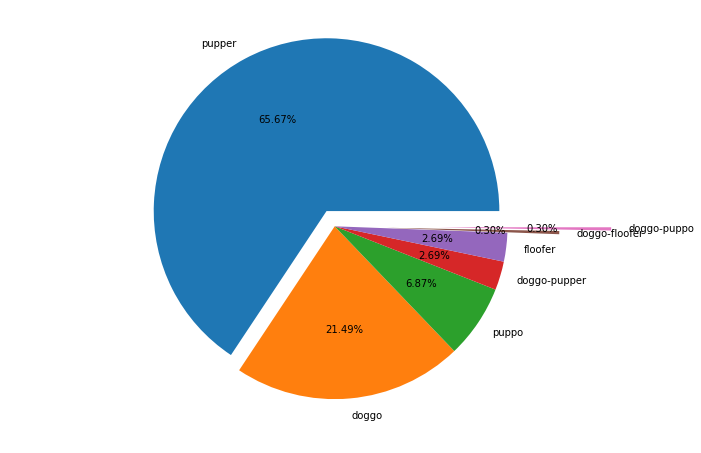

In [79]:
dog_stage = df['dog_stage'].value_counts()
print(dog_stage)
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1.5,1.5])
ax.axis('equal')
explode = [0.1, 0, 0, 0, 0, 0.3, 0.6]
ax.pie(dog_stage, labels= dog_stage.index, autopct= "%0.2f%%", explode= explode);

### Insight:
- `pupper` is the most popular type and it gets the most reactions from users, which means that users prefer tiny and adorable dogs. Although this analysis might not be true since there are missing data. 

## 2- retweet and favorite relation

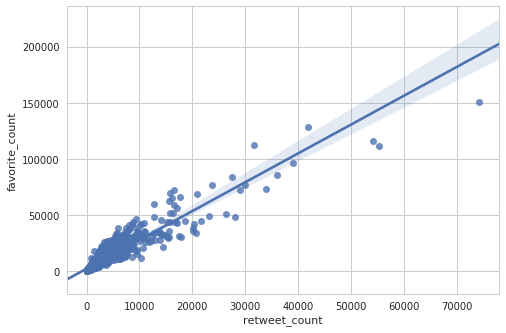

In [80]:
sns.set(style="whitegrid")
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.regplot(data= df, x='retweet_count', y='favorite_count');

### insight:
- There is a positive correlation between retweet and favorite count, which means most people who retweets tend to also favorite the tweet.

## 3- tweets about / not about dogs

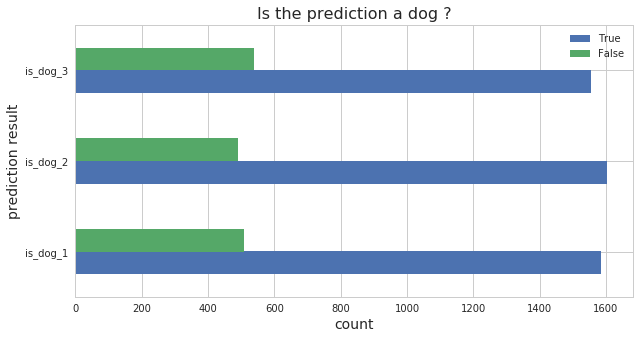

In [81]:
predictions = df[['is_dog_1', 'is_dog_2', 'is_dog_3']].apply(pd.Series.value_counts).transpose()
predictions.plot(kind='barh', figsize=(10,5))
plt.ylabel('prediction result', fontsize=14)
plt.xlabel('count', fontsize=14)
plt.title('Is the prediction a dog ?',fontsize=16);

### insight:
- the 3 prediction levels indicates that most tweets were about dogs, and about one third were not.

## 4- most common source

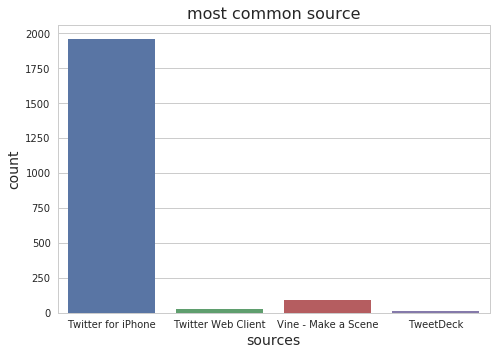

In [82]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
sns.countplot(data = df, x = 'source');
plt.xlabel('sources', fontsize=14)
plt.ylabel('count', fontsize=14)
plt.title('most common source',fontsize=16);

### insight:
- 'Twitter for iPhone' is the most used source, which means most users interact with posts via twitter app.

## 5- Top 10 dog names

Charlie    11
Lucy       11
Oliver     10
Cooper     10
Tucker     9 
Penny      9 
Lola       8 
Sadie      8 
Winston    8 
Toby       7 
Name: name, dtype: int64


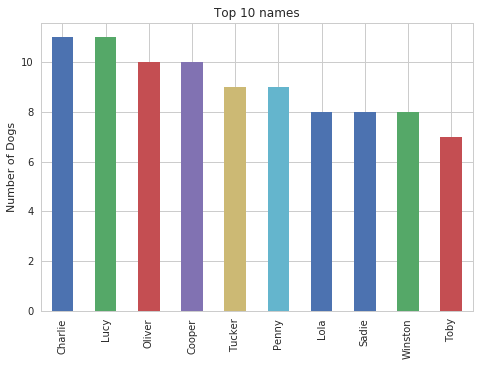

In [83]:
top_names = df['name'].value_counts()[:10]
print(top_names)
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
top_names.plot('bar', title='Top 10 names').set_ylabel("Number of Dogs");

### insight:
- Apparently, 'Charlie' and 'Lucy' have the highest frequency with 33 times frequency.

## 6- Top 5 common dog kinds

Golden_retriever      137
Labrador_retriever    94 
Pembroke              88 
Chihuahua             78 
Pug                   54 
Name: prediction_1, dtype: int64


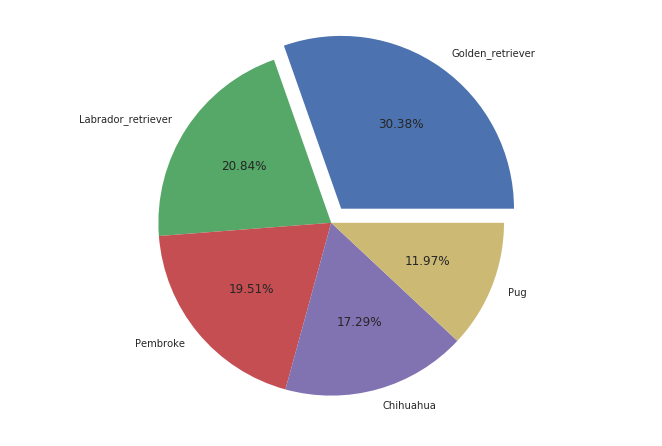

In [84]:
dog_kind = df.prediction_1.value_counts()[:5]
print(dog_kind)
fig = plt.figure()
ax = fig.add_axes([0.5,0.5,1.5,1.5])
ax.axis('equal')
explode = [0.1, 0, 0, 0, 0]
ax.pie(dog_kind, labels= dog_kind.index, autopct= "%0.2f%%", explode= explode);

### insight:
- About 30.4 percent of the posted dogs were of golden retriever kind, and about 20.8 percent were of labrador retriever, this means that the retriever kind is so popular among dog adopters.

# End of project